<div class="alert alert-info"> <b>Link to dashboard:</b> https://public.tableau.com/app/profile/iuliia5275/viz/Bankdashboard_16784135013690/Dashboard1?publish=yes

</div>



# Bank customer churn analysis project

**Objective of the project:**

It is necessary to analyze the segments of the bank's customers in order to determine the portraits of customers who tend to leave the bank.

Formulate conclusions and recommendations for the customer to reduce the level of customer churn.


**Project customer:**

Product manager

**Data:**

he dataset contains data about the clients of Metanprom Bank. The bank is located in Yaroslavl and regional cities: Rostov Veliky and Rybinsk.

Колонки:

- `userid` — id of the user,
- `score` — credit scores,
- `City` — city,
- `Gender` — gender,
- `Age` — age,
- `Objects` — number of objects in the property,
- `Balance` — account balance,
- `Products` — number of products used by the customer,
- `CreditCard` — does the customer have a credit card,
- `Loyalty` — active client,
- `estimated_salary` — зclient salary,
- `Churn` — gone or not.

## Project plan

### Stage 1. Data acquisition

- import libraries
- data loading
- familiarization with the dataset

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
#open file

try: # yandex way
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')
except: # local way
    data = pd.read_csv('bank_dataset.csv')

In [3]:
#familiarization with the dataset
data.head() 

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#get general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**Overall conclusion for Stage 1:**

The dataset is presented in the form of 10,000 data records about bank customers in 3 cities: Yaroslavl, Rostov Veliky and Rybinsk. In total, in the presented sample, customers use 4 products.

### Stage 2. Data preprocessing

- bring the names of the columns to a single style (lower case, no gaps, etc.)
- check for gaps and formulate assumptions about their causes and possibilities for correction
- check for duplicates
- check for outliers (anomaly or not, should be removed or not)
- bring data types to the correct types


In [5]:
# convert column names to lower case
data.columns = data.columns.str.lower()
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [6]:
#check the number of passes
print(data.isna().sum())

userid                 0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64


In [7]:
data_without_balance = data[data.isna().any(axis=1)]
           
data_without_balance.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,3.617000e+03,3617.000000,3617.000000,3617.000000,0.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236
std,7.194749e+04,96.158798,10.492002,2.860781,NaN,0.496455,0.450704,0.499751,57730.828955,0.345195
min,1.560844e+07,350.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.567226e+07,583.000000,31.000000,3.000000,NaN,1.000000,0.000000,0.000000,49506.820000,0.000000
50%,1.573608e+07,651.000000,37.000000,5.000000,NaN,2.000000,1.000000,1.000000,98618.790000,0.000000
75%,1.579629e+07,717.000000,43.000000,7.000000,NaN,2.000000,1.000000,1.000000,148330.970000,0.000000
max,1.585810e+07,850.000000,88.000000,10.000000,NaN,4.000000,1.000000,1.000000,199992.480000,1.000000


Looking at the data of users who have missing values in the balance, we do not see any anomalies in the rest of the indicators.

There are gaps only in the column with the account balance (a third of the entire dataset).

Let's convert the value of the column with the balance to a binary type to see how users are distributed according to different characteristics, depending on whether the balance amount is indicated or not.



In [8]:
# make a copy of the balance column to translate to the values "not specified" and "specified"
data['balance_c'] = data['balance'].copy()

In [9]:
#fill in the column
data['balance_c'] = data['balance_c'].fillna('non defined')
data.loc[(data['balance_c'] != 'non defined'), 'balance_c'] = 'defined'

In [10]:
#a function that will take an array of features as input, for which we want to see the data in a tabular form

def balance_data (columns):

    plt.figure(figsize=(20,10))
    
    for i, column in enumerate(columns):
        bins=data[column].unique().__len__()
    
        sns.histplot(x=column
                     , bins=bins
                     , data=data
                     , hue = 'balance_c'
                     , multiple = 'stack'
                     , palette = 'Blues'
                     , ax=plt.subplot(2, 3, i + 1))
        plt.xlabel(column)
        plt.ylabel('quantity of clients')
        
    plt.tight_layout()  
    plt.show()

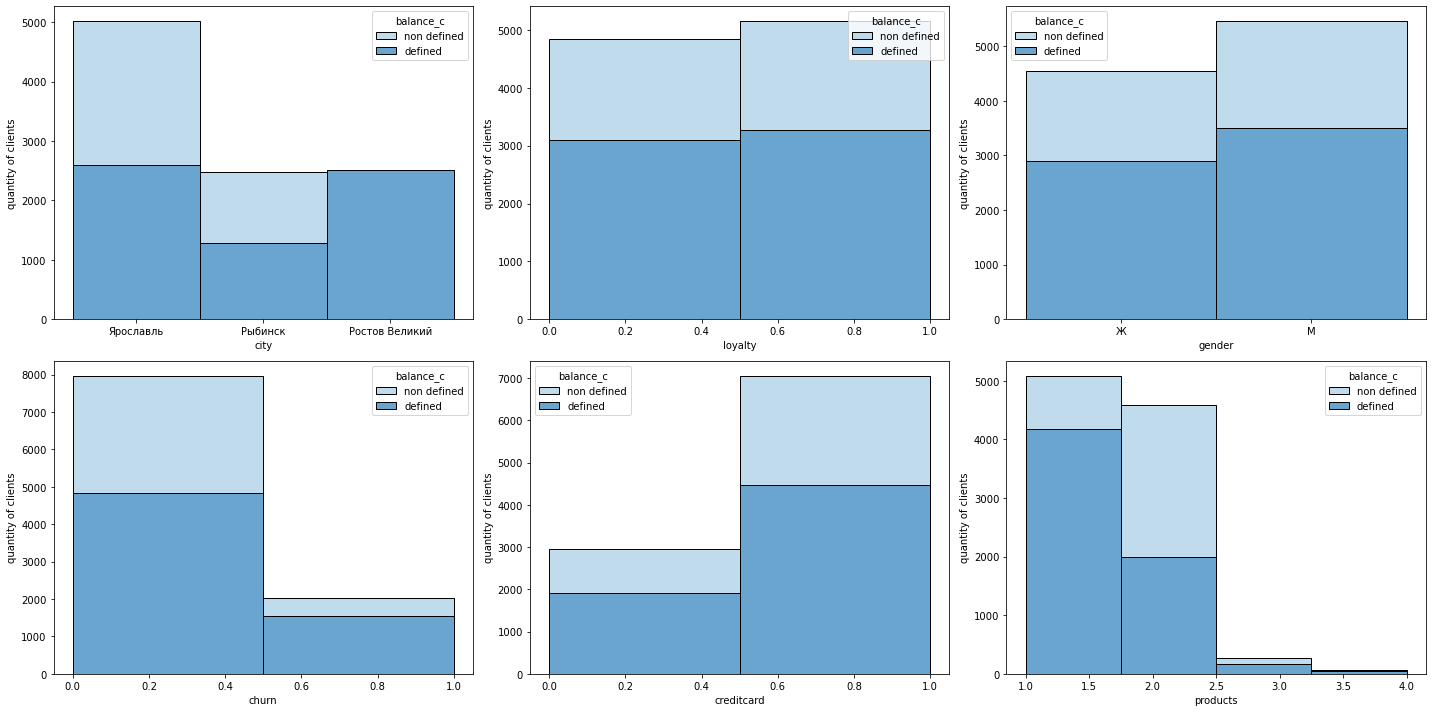

In [11]:
#an array of features of interest for analysis
balance_data(['city','loyalty','gender','churn','creditcard','products'])

From the data obtained, we can see the following features:

1. In Rostov Velikiy all clients have balance values, while in other cities there are gaps.
2. For users who have stopped using the services of the bank, the share of passes is significantly higher than for those who have remained using the services.
3. The more products - the more passes.
4. Users without credit cards in the bank have a higher percentage of skips.


In general, there may be several reasons:
- firstly, it may be a technical upload error (as a rule, a bank has a large number of different data accounting systems and an error could occur when different indicators are consolidated from different databases into one table). The probability of a technical error is also confirmed by the data broken down by city - there cannot be a single pass in one city, but they are in the rest. Probably, the data is there, it's just that it is incorrectly uploaded to the general table.
 
 - secondly, this error may be due to a negative balance on the account, which could not be unloaded correctly and therefore there was a pass.
 
In any of these cases, we cannot fill in the gaps ourselves, because this would be a corruption of the data. We will not delete them either, since we will lose a large amount of initial data.

In [12]:
#check duplicates
print(data.duplicated().sum())

0


No duplicates found.

In [13]:
#the number of unique values
print(data.nunique())

userid              10000
score                 460
city                    3
gender                  2
age                    70
objects                11
balance              6381
products                4
creditcard              2
loyalty                 2
estimated_salary     9999
churn                   2
balance_c               2
dtype: int64


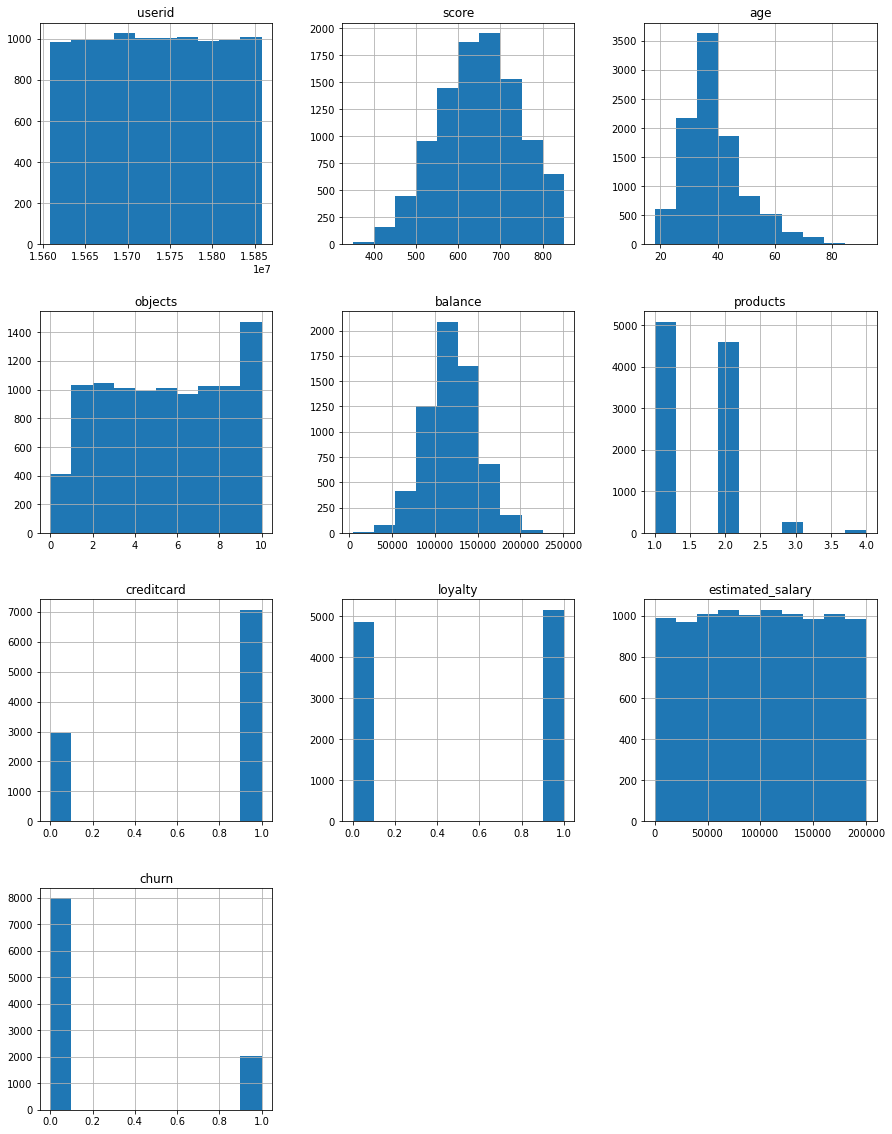

In [14]:
#check for anomalies (outliers) in the entire dataset
#histogram for each column of data table
data.hist(figsize=(15, 20)) 
plt.show()

As can be seen from the table, all values are within adequate limits.

The data types are reflected in the dataset correctly, so we will not make any changes.

In [15]:
#change the categorical values for the city and gender for further work:
#calculate the average and correlations of some numerical indicator for these categories
# make copies of the necessary columns
data['city_c'] = data['city'].copy()
data['gender_c'] = data['gender'].copy()

In [16]:
# recode
data = pd.get_dummies(data, columns=['city_c', 'gender_c'])

In [17]:
#fix the names of the new columns for more convenient work in the future
data = data.rename(columns={'city_c_Ростов Великий': 'rostov_v'
                            , 'city_c_Рыбинск': 'rybinsk'
                            , 'city_c_Ярославль': 'yaroslavl'
                            , 'gender_c_Ж': 'female'
                            , 'gender_c_М': 'male'})

**Overall conclusion for Stage 2:**

The only column with gaps in the dataset is the account balance. The data could have been skipped due to a technical error, we will not fill them in, since there is no objectively correct way for this (the median and average will not give any information, they can only distort the dataset).

Вuplicates and anomalies in the dataset were not identified, all types of data are indicated correctly.

### Stage 3. Exploratory data analysis

- study the dataset and the distribution of features: build graphs broken down by cities, ages, etc.
- build a correlation matrix

In [18]:
#look at the statistical information for the entire dataset
data.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,rostov_v,rybinsk,yaroslavl,female,male
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.501400,0.454300,0.545700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.500023,0.497932,0.497932
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the table, we can draw the following conclusions for the entire data set:

- The average credit score is 650, which corresponds to 50% of the dataset users.
- The average age of clients is 37 years old.
- On average, clients own 5 properties, with a maximum value of 10.
- The average balance on the account is around 120,000 rubles, with a maximum of 250,000 rubles.
- 75% of clients use no more than 2 bank products.
- 70% of clients have a credit card.
- 52% of clients belong to the "active" category.
- The average salary level is around 100,000 rubles, with a maximum of 200,000 rubles.
- 20% of clients have stopped using the bank's services.
- The majority of clients (50%) are from Yaroslavl, Rostov Veliky, and Rybinsk, with each city servicing 25% of the total number of clients.
- Men make up 55% of the total number of clients, while women make up 45%.
- The key indicator from the table that we see is the churn rate of 20% of clients. This is a significant level.

Next, let's take a closer look at how churn is distributed across the presented features.

In [19]:
#how the average values are distributed among those who left and those who continued to use the bank's services.
data.groupby('churn').agg('mean').round(2)

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,rostov_v,rybinsk,yaroslavl,female,male
churn,,,,,,,,,,,,,,
0,15733903.88,651.85,37.41,5.03,119535.86,1.54,0.71,0.55,99738.39,0.21,0.26,0.53,0.43,0.57
1,15732787.96,645.35,44.84,4.93,120746.97,1.48,0.70,0.36,101465.68,0.40,0.20,0.40,0.56,0.44


here were no significant deviations among the average values detected.

However, the following differences can be noted:

The average age of the departed clients is 45 years old, while for those who remained, it is 47 years old.
There is a high proportion of churn in Rostov Veliky (40%) and Yaroslavl (40%), while in Rybinsk, the churn rate does not exceed 20%.
The majority of departed clients are women (56%).

To visualize the churn rate of clients for the following features, we can plot histograms for the quantitative data:

1. Age
2. Income
3. Number of properties
4. Credit score

In [20]:
#distribution histogram
def quantity_data (column):

    data.groupby('churn')[column].plot(kind='hist', bins=20, alpha=0.5, figsize = (15, 7))

    plt.xlabel(column)
    plt.ylabel('quantity of clients')
    plt.legend(labels=['active', 'churn'])
    plt.show()



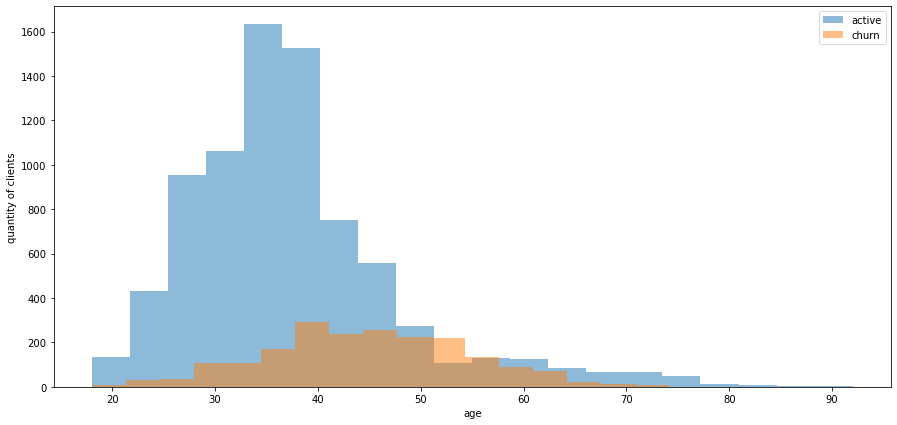

In [21]:
quantity_data ('age')

In the graph, we can see that a larger number of lost clients are in the age range of 40 to 50 years. At the same time, we see that the age range of 35 to 40 represents the largest number of active clients 

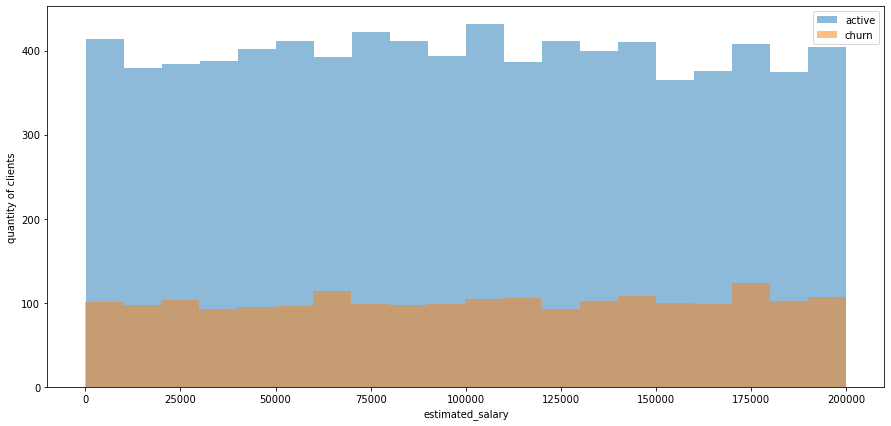

In [22]:
quantity_data ('estimated_salary')

From the graph, we can see that the proportion of lost clients remains stable among clients with any income level

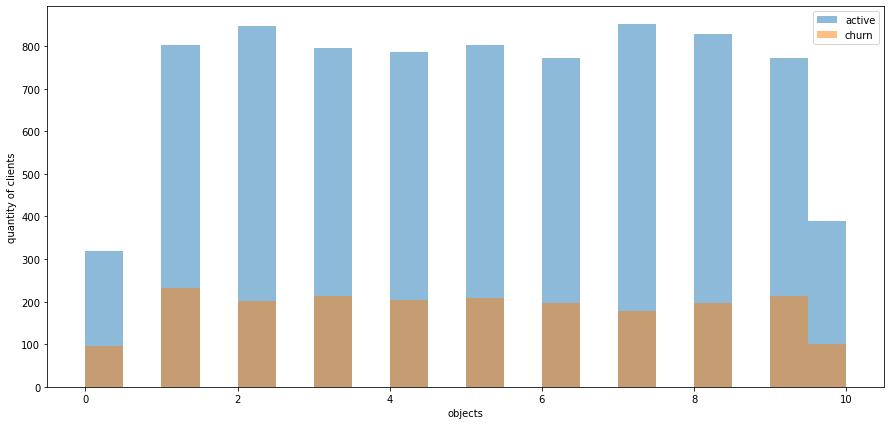

In [23]:
quantity_data ('objects')

From the graph, we can see that the customer churn rate does not significantly change based on the number of objects owned by the customers.

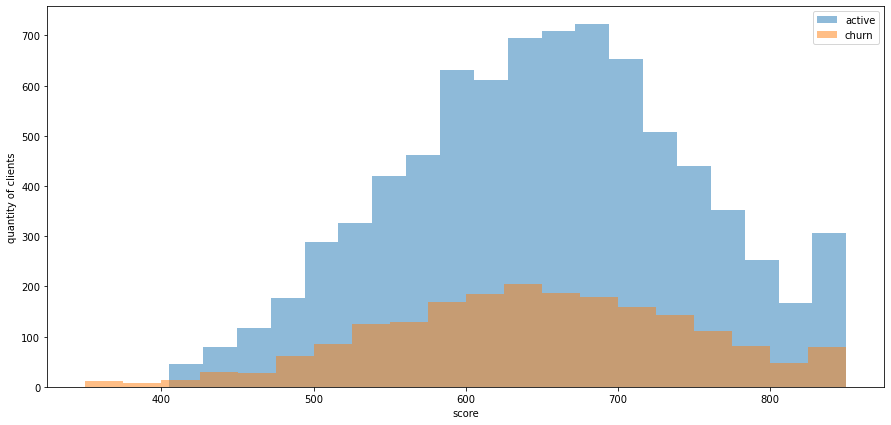

In [24]:
quantity_data ('score')

From the graph, we can see that the highest customer churn rate is among those who have 600-700 points in the credit scoring system, which corresponds to the overall distribution of customers - this scoring range has the highest number of customers.

For categorical data, let's create histograms with accumulation for:

City
Gender
Number of products
Presence of credit cards

In [25]:
def category_data (columns):

    plt.figure(figsize=(20,10))
    
    for i, column in enumerate(columns):
        bins=data[column].unique().__len__()
    
        sns.histplot(x=column
                     , bins=bins
                     , data=data
                     , hue = 'churn'
                     , multiple = 'stack'
                     , palette = 'Blues'
                     , ax=plt.subplot(2, len(columns)-2, i + 1))
        plt.xlabel(column)
        plt.ylabel('quantity of clients')
    
    plt.tight_layout()  
    plt.show()

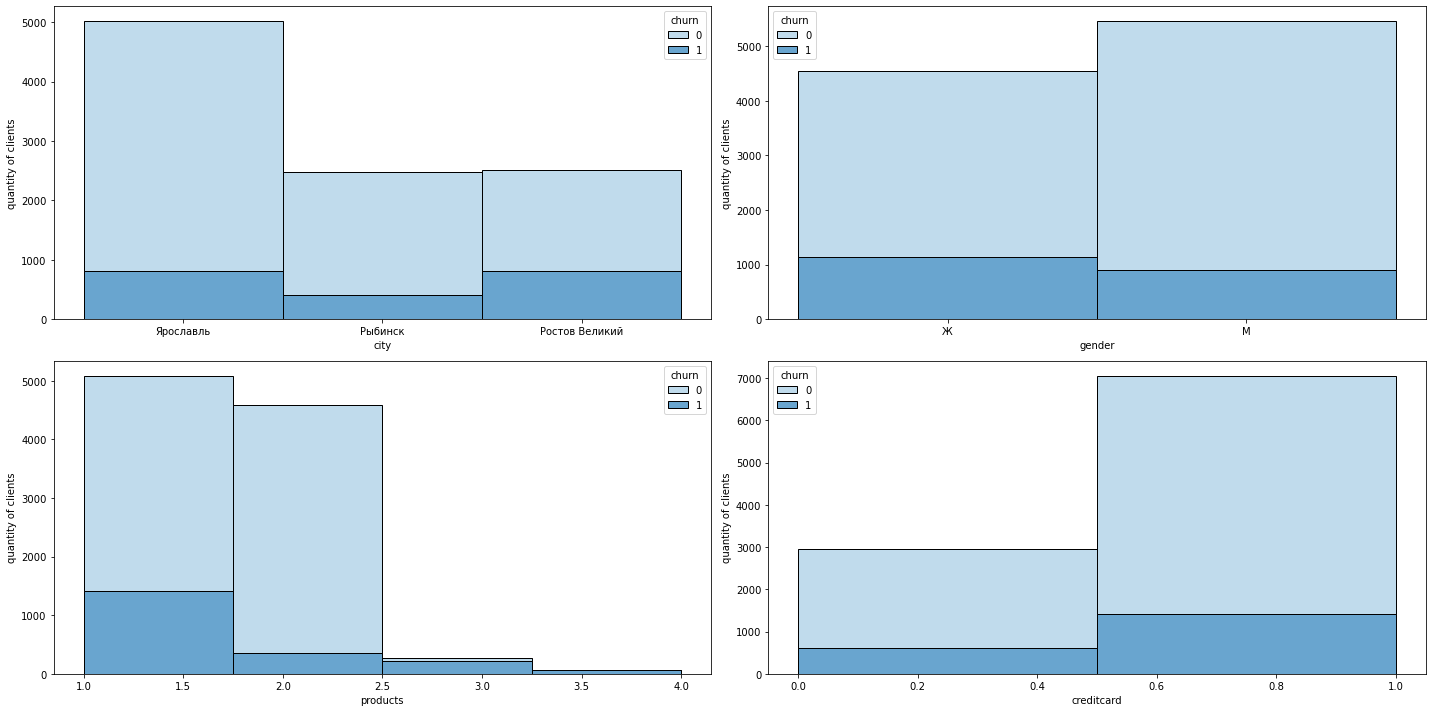

In [26]:
category_data(['city','gender','products','creditcard'])

1. The highest customer churn is observed in Rostov Veliky among the presented cities.
2. Women are more likely to refuse bank services, although the difference relative to men is not significant.
3. The highest churn is shown by clients who use 3 or more bank products.
4. The presence of a credit card does not have a significant impact on churn.

Let's create a correlation matrix among the presented features.

In [27]:
corr=data.drop('userid', axis=1).corr()
corr.style.background_gradient(cmap='Blues')

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,rostov_v,rybinsk,yaroslavl,female,male
score,1.000000,-0.003965,0.000842,-0.004744,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.008928,0.002857,-0.002857
age,-0.003965,1.000000,-0.009997,-0.012822,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.039208,0.027544,-0.027544
objects,0.000842,-0.009997,1.000000,0.005827,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,-0.002848,-0.014733,0.014733
balance,-0.004744,-0.012822,0.005827,1.000000,-0.001027,0.006721,-0.020418,-0.001856,0.017208,-0.002604,-0.000208,0.002759,-0.025742,0.025742
products,0.012238,-0.030680,0.013444,-0.001027,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,0.001230,0.021859,-0.021859
creditcard,-0.005458,-0.011721,0.022583,0.006721,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.002467,-0.005766,0.005766
loyalty,0.025651,0.085472,-0.028362,-0.020418,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.003317,-0.022544,0.022544
estimated_salary,-0.001384,-0.007201,0.007784,-0.001856,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.003332,0.008112,-0.008112
churn,-0.027094,0.285323,-0.014001,0.017208,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.104955,0.106512,-0.106512
rostov_v,0.005538,0.046897,-0.000567,-0.002604,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.580359,0.024628,-0.024628


Based on the correlation matrix, we can see that the following features have the strongest correlation with churn:

Age (0.29)
Rostov Veliky (0.17)
Female gender (0.10).

**General conclusion for Stage 3:**

The overall level of churn from the number of clients in the dataset is 20%.

Features that may affect churn:

1. Age - people aged 40-50 are more likely to refuse bank services
2. City - Rostov Veliky shows the highest number of lost clients among other cities.
3. Gender - women are more likely to stop using bank services.
4. Number of products - the more products, the higher the proportion of clients who have discontinued using the bank's services.

Features with the least impact on churn:

1. Income level
2. Number of owned properties
3. Credit rating
4. Presence of credit cards



### Stage 4. Customer Segmentation

- Form segments based on several features (depending on the number of products)
- Form profiles of segments among users who are most likely to churn


Let's add segmentation by the number of products.

In total, we will have 3 segments of clients:

1. Those who use 1 product
2. Those who use 2 products
3. Those who use more than 3 products.

In [28]:
#form 3 groups based on the number of products used by clients.

def product_segment (products): 
    if products == 1:   
        return '1 product'
    if products == 2:
        return '2 products'
    else:
        return 'more than 3 products'
 
data['product_segment'] = data['products'].apply(product_segment) 

In [29]:
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_c,rostov_v,rybinsk,yaroslavl,female,male,product_segment
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,non defined,0,0,1,1,0,1 product
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,defined,0,1,0,1,0,1 product
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,defined,0,0,1,1,0,more than 3 products
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,non defined,0,0,1,1,0,2 products
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,defined,0,1,0,1,0,1 product


In [30]:
def segment_data (column):

    plt.figure(figsize=(10,7))
    bins=data[column].unique().__len__()
    sns.histplot(x=column
                 , bins=bins
                 , data=data
                 , hue = 'churn'
                 , multiple = 'stack'
                 , palette = 'Blues')
    plt.xlabel(column)
    plt.ylabel('quantity of clients')
    plt.show()
    
    # add a table with the number of remaining and lost customers, as well as calculate the share of lost customers.

    data_table = data.pivot_table(index=column, columns='churn', aggfunc={'userid':'count'})

    data_table.columns = ['Active', 'Churn']

    data_table['Percent, %'] = (data_table['Churn'] / (data_table['Active'] + data_table['Churn'])*100).round(1)
    display(data_table)

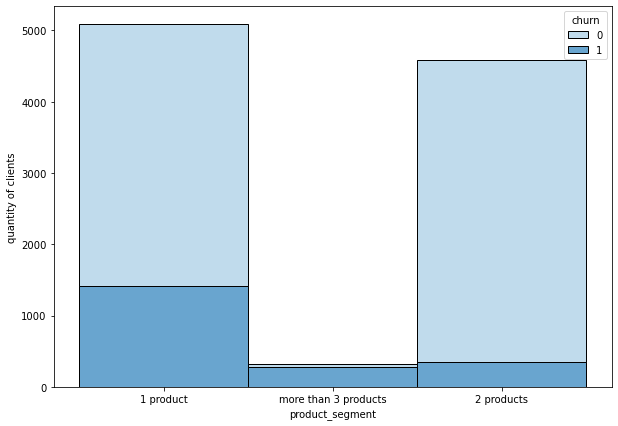

,Active,Churn,"Percent, %"
product_segment,,,
1 product,3675,1409,27.7
2 products,4242,348,7.6
more than 3 products,46,280,85.9


In [31]:
segment_data('product_segment')

Based on the graph, we can see that the highest churn rate occurs among customers who use more than 3 products.

Divide all users into age groups.

In [32]:
def age_segment (age): 
    if age <30:   
        return 'young'
    if  40> age >30:
        return 'middle'
    if  65> age >40:
        return 'adult'
    else:
        return 'elderly'
 
data['age_segment'] = data['age'].apply(age_segment) 


In [33]:
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_c,rostov_v,rybinsk,yaroslavl,female,male,product_segment,age_segment
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,non defined,0,0,1,1,0,1 product,adult
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,defined,0,1,0,1,0,1 product,adult
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,defined,0,0,1,1,0,more than 3 products,adult
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,non defined,0,0,1,1,0,2 products,middle
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,defined,0,1,0,1,0,1 product,adult


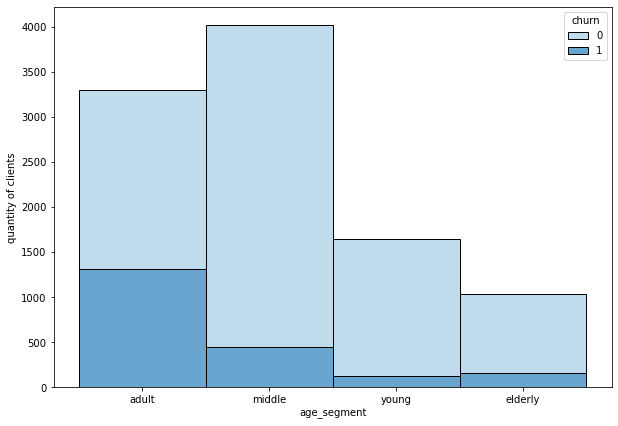

,Active,Churn,"Percent, %"
age_segment,,,
adult,1991,1308,39.6
elderly,885,156,15.0
middle,3570,449,11.2
young,1517,124,7.6


In [34]:
segment_data('age_segment')

Based on the graph, we can see that the highest churn rate is among "middle-aged" clients, i.e. those aged between 40 and 65 years.

**Let's check the relationship between the number of products and different features.**

As part of our exploratory analysis, we have identified that the most significant features influencing churn are age, gender, and city of residence.

Let's plot graphs showing the distribution of churn across the 3 segments we identified.

In [35]:
#add another parameter to the function for plotting, which will filter the dataset by the number of products.
def category_data_with_n_products (columns,products):

    plt.figure(figsize=(20,10))
    
    for i, column in enumerate(columns):
        bins=data[column].unique().__len__()
    
        sns.histplot(x=column
                     , bins=bins
                     , data=data.query('product_segment==@products')
                     , hue = 'churn'
                     , multiple = 'stack'
                     , palette = 'Blues'
                     , ax=plt.subplot(2, len(columns), i + 1))
        plt.xlabel(column)
        plt.ylabel('quantity of clients')
    
    plt.tight_layout()  
    plt.show()
    
    #add a table with the number of remaining and churned clients, as well as the calculation of the churn rate.
    data_table = data.query('product_segment==@products').pivot_table(index=columns, columns='churn', aggfunc={'userid':'count'})

    data_table.columns = ['Active', 'Churn']

    data_table['Percent, %'] = (data_table['Churn'] / (data_table['Active'] + data_table['Churn'])*100).round(1)
    display(data_table)

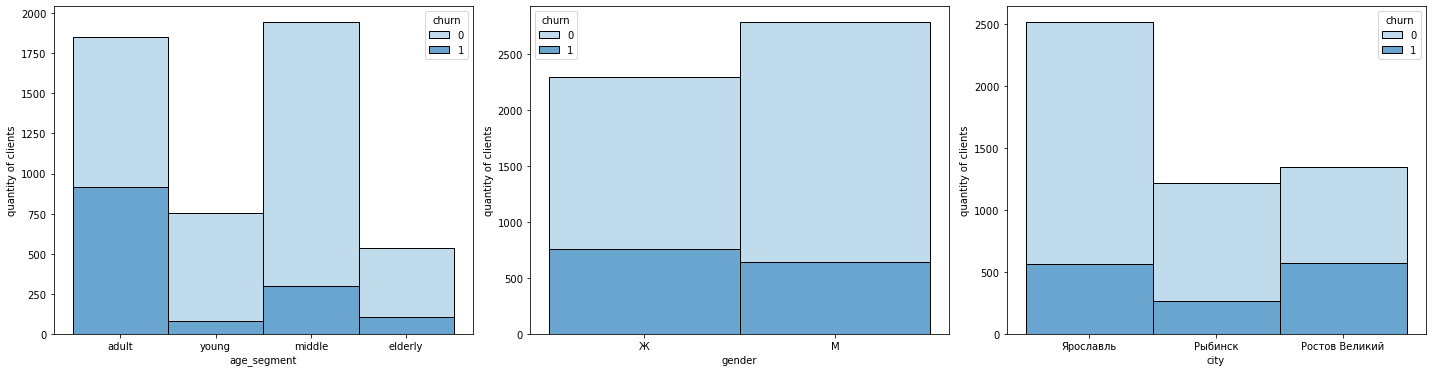

Active  Churn  Percent, %
age_segment gender city                                     
adult       Ж      Ростов Великий      91    201        68.8
                   Рыбинск            112     83        42.6
                   Ярославль          189    200        51.4
            М      Ростов Великий     104    178        63.1
                   Рыбинск            161     81        33.5
                   Ярославль          278    172        38.2
elderly     Ж      Ростов Великий      40     19        32.2
                   Рыбинск             46     12        20.7
                   Ярославль           85     33        28.0
            М      Ростов Великий      47     21        30.9
                   Рыбинск             63     10        13.7
                   Ярославль          145     15         9.4
middle      Ж      Ростов Великий     148     71        32.4
                   Рыбинск            153     33        17.7
                   Ярославль          381     63        14.2
            М      Ростов Великий     181     55        23.3
                   Рыбинск            265     30        10.2
                   Ярославль          513     50         8.9
young       Ж      Ростов Великий      72     22        23.4
                   Рыбинск             67     10        13.0
                   Ярославль          150     15         9.1
            М      Ростов Великий      88     11        11.1
                   Рыбинск             87      8         8.4
                   Ярославль          209     16         7.1

In [36]:
category_data_with_n_products(['age_segment','gender','city'],['1 product'])

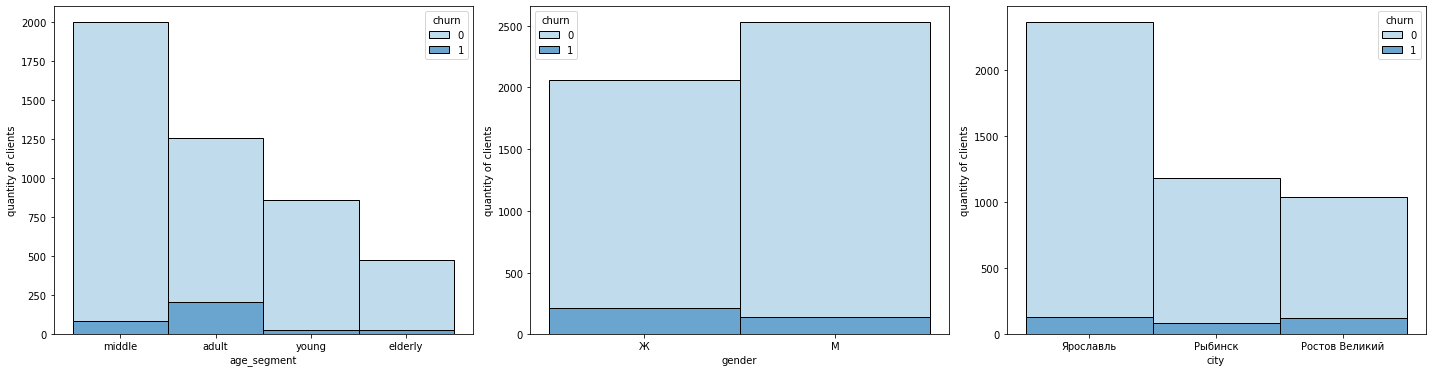

Active  Churn  Percent, %
age_segment gender city                                     
adult       Ж      Ростов Великий     108     46        29.9
                   Рыбинск            123     36        22.6
                   Ярославль          228     45        16.5
            М      Ростов Великий     135     30        18.2
                   Рыбинск            154     22        12.5
                   Ярославль          300     30         9.1
elderly     Ж      Ростов Великий      49      9        15.5
                   Рыбинск             42      1         2.3
                   Ярославль          110      4         3.5
            М      Ростов Великий      56      6         9.7
                   Рыбинск             57      2         3.4
                   Ярославль          136      4         2.9
middle      Ж      Ростов Великий     162     17         9.5
                   Рыбинск            217     10         4.4
                   Ярославль          429     28         6.1
            М      Ростов Великий     241     10         4.0
                   Рыбинск            289      9         3.0
                   Ярославль          572     14         2.4
young       Ж      Ростов Великий      68      3         4.2
                   Рыбинск             92      6         6.1
                   Ярославль          222      5         2.2
            М      Ростов Великий      95      5         5.0
                   Рыбинск            122      1         0.8
                   Ярославль          235      5         2.1

In [37]:
category_data_with_n_products(['age_segment','gender','city'],['2 products'])

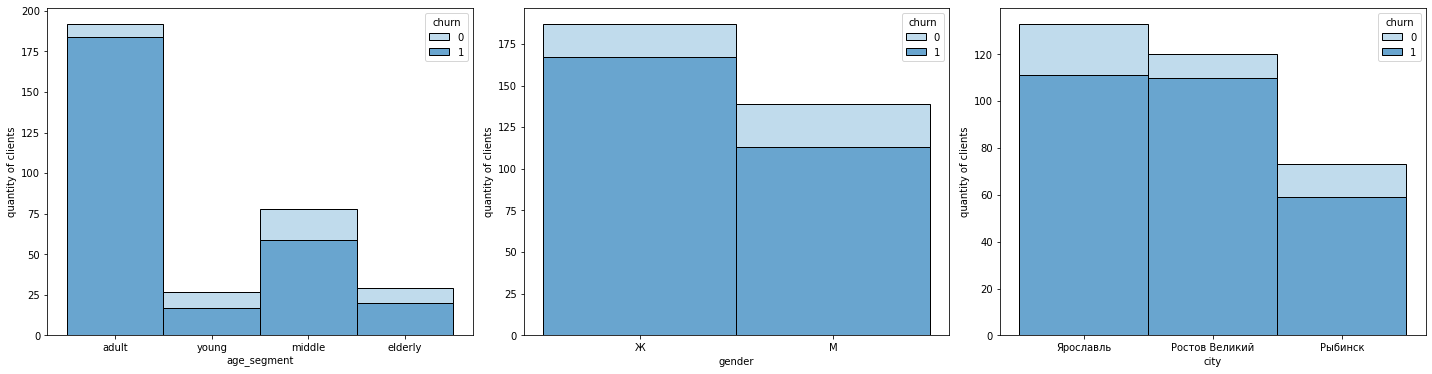

Active  Churn  Percent, %
age_segment gender city                                     
adult       Ж      Ростов Великий     2.0   36.0        94.7
                   Рыбинск            NaN   28.0         NaN
                   Ярославль          1.0   47.0        97.9
            М      Ростов Великий     1.0   32.0        97.0
                   Рыбинск            1.0   10.0        90.9
                   Ярославль          3.0   31.0        91.2
elderly     Ж      Ростов Великий     NaN    3.0         NaN
                   Рыбинск            1.0    1.0        50.0
                   Ярославль          2.0    6.0        75.0
            М      Ростов Великий     NaN    7.0         NaN
                   Рыбинск            1.0    2.0        66.7
                   Ярославль          5.0    1.0        16.7
middle      Ж      Ростов Великий     3.0   17.0        85.0
                   Рыбинск            5.0    5.0        50.0
                   Ярославль          1.0   11.0        91.7
            М      Ростов Великий     2.0    9.0        81.8
                   Рыбинск            3.0    6.0        66.7
                   Ярославль          5.0   11.0        68.8
young       Ж      Ростов Великий     2.0    4.0        66.7
                   Рыбинск            NaN    6.0         NaN
                   Ярославль          3.0    3.0        50.0
            М      Ростов Великий     NaN    2.0         NaN
                   Рыбинск            3.0    1.0        25.0
                   Ярославль          2.0    1.0        33.3

In [38]:
category_data_with_n_products(['age_segment','gender','city'],['more than 3 products'])

Conclusions based on the graphs:

1. The graphs show that the most loyal customers are those who use 2 bank products. The highest churn rate is among those who use 3 or more products.
2. The highest churn rate is among customers in the "mature" category, i.e. from 40 to 65 years old. The most loyal are customers from the "middle" category, i.e. from 30 to 40 years old.
3. The leader in churn rate among cities is Rostov Veliky, and the lowest churn rate is in Yaroslavl.
4. Women are more likely to stop using the bank's services compared to men.

**Overall conclusion for Stage 4:**

Based on the above, let's create portraits of customers who are likely to refuse to use the bank's services:

*1st segment: use 1 product.*

Women living in Rostov Veliky aged 40 to 65. Churn rate - 68.8%.

*2nd segment: use 2 products.*

Women living in Rostov Veliky aged 40 to 65. Churn rate - 29.9%.

*3rd segment: use more than 3 products.*

Women living in Rostov Veliky aged 40 to 65. Churn rate - 94.7%.

Overall, the most vulnerable segment regardless of the features are the customers who use 3 or more products. Churn rate - 85.9%.




    
 

### Stage 5. Statistical hypothesis testing

Hypotheses:

- The average incomes of clients who use two bank products and those who use one product are the same.
- The average age of clients who left and those who stayed is the same.

We will use the t-test (Student's test).


H₀ - The average income of customers who use two bank products and those who use one product are equal.

H₁ - The average income of customers who use two bank products and those who use one product are not equal.

In [39]:
# Variable with a slice of customers with 1 product
data_1_product = data.query('products == 1')
data_1_product.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_c,rostov_v,rybinsk,yaroslavl,female,male,product_segment,age_segment
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,non defined,0,0,1,1,0,1 product,adult
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,defined,0,1,0,1,0,1 product,adult
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,defined,0,1,0,1,0,1 product,adult
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0,defined,0,0,1,0,1,1 product,young
16,15780188,653,Ростов Великий,М,58,1,132602.88,1,1,0,5097.67,1,defined,1,0,0,0,1,1 product,adult


In [40]:
# Variable with a slice of customers with 2 products
data_2_product = data.query('products == 2')
data_2_product.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_c,rostov_v,rybinsk,yaroslavl,female,male,product_segment,age_segment
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,non defined,0,0,1,1,0,2 products,middle
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,defined,0,1,0,0,1,2 products,adult
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,non defined,0,0,1,0,1,2 products,adult
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0,defined,0,0,1,0,1,2 products,adult
10,15810557,528,Ярославль,М,31,6,102016.72,2,0,0,80181.12,0,defined,0,0,1,0,1,2 products,middle


In [41]:
#We will use a special method to test the hypothesis of equality of the means of two populations.
alpha = 0.05 # critical level of statistical significance

results = st.ttest_ind(
    data_1_product['estimated_salary'], 
    data_2_product['estimated_salary'],
    equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value: 0.4106493940071987
Failed to reject the null hypothesis


The probability of obtaining equality of means in two samples is 41%. Therefore, the null hypothesis is likely to be true.



H₀ - The average age of customers who left and those who use bank products is the same.

H₁ - The average age of customers who left and those who use bank products is not the same.


In [42]:
# Variable with a slice of customers who left
data_churn = data.query('churn == 1')
data_churn.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_c,rostov_v,rybinsk,yaroslavl,female,male,product_segment,age_segment
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,non defined,0,0,1,1,0,1 product,adult
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,defined,0,0,1,1,0,more than 3 products,adult
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,defined,0,1,0,0,1,2 products,adult
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1,defined,1,0,0,1,0,more than 3 products,young
16,15780188,653,Ростов Великий,М,58,1,132602.88,1,1,0,5097.67,1,defined,1,0,0,0,1,1 product,adult


In [43]:
# Variable with a slice of customers who staied
data_not_churn = data.query('churn == 0')
data_not_churn.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_c,rostov_v,rybinsk,yaroslavl,female,male,product_segment,age_segment
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,defined,0,1,0,1,0,1 product,adult
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,non defined,0,0,1,1,0,2 products,middle
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,defined,0,1,0,1,0,1 product,adult
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,non defined,0,0,1,0,1,2 products,adult
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0,defined,0,0,1,0,1,2 products,adult


In [44]:
#We will use a special method to test the hypothesis of equality of the means of two populations.
alpha = 0.05 # critical level of statistical significance

results = st.ttest_ind(
    data_churn['age'], 
    data_not_churn['age'],
    equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value: 4.7127272656641046e-179
Rejecting the null hypothesis


The null hypothesis was not confirmed.
Overall, within the study we have confirmed this with factual data - the average age of churned customers significantly differs from the average age of loyal customers. 

### Stage 6. Conclusions and recommendations

- general information about work
- indicative description of segments and recommendations.

Based on the analysis of the data of "Matanprombank" customers, it was revealed that the customer churn rate is 20%.


The most significant features affecting churn are:

1. Number of products: if customers use more than 3 products, they are more likely to terminate their cooperation with the bank.
2. City of residence: the biggest issues were identified in the city of Rostov Veliky, where the highest churn rate was recorded.
3. Age: customers in the "adult" category from 40 to 65 years old most often stop using the bank's services.

The following user segments were identified within the study:

**Segment 1 - Use 1 product**

*Description:*
- The overall churn rate in this segment is 27.7%.

- The most loyal customers are men and women living in Yaroslavl, aged under 30. The churn rate is between 7% and 9%.

- The least loyal customers are primarily women living in Rostov Veliky, aged 40 to 65. The churn rate is 68.8%.

*Recommendations:*

It is necessary to consider offering customers one more product, as the data shows that when a customer uses 2 products, their relationship with the bank is more stable.

**Segment 2 - Use 2 products**

*Description:*
- The overall churn rate in this segment is 7.6%.

- The most loyal customers are men living in Rybinsk, aged under 30, with a churn rate of 0.8%, and women living in Yaroslavl, aged under 30, with a churn rate of 2.2%.

- The least loyal customers are primarily women living in Rostov Veliky, aged 40 to 65, with a churn rate of 29.9%.

*Recommendations:*

The data shows that when a customer uses 2 products, their relationship with the bank is more stable. This segment has the lowest churn rate among bank customers.

**Segment 3 - Use 3 or more products**

*Description:*
- The overall churn rate in this segment is 85.9%.

- The churn rate is too high, and identifying loyal customers is irrelevant.

- The least loyal customers are men and women living in Rostov Veliky, aged 40 to 65, with a churn rate averaging between 95-97%.

*Recommendations:*

1. Develop a marketing strategy regarding the products offered: as a hypothesis, people stop using bank products due to the excessive presence of the bank in their daily lives. Once the number of products exceeds 3, the client may start feeling "pressure" from the bank and stop using their services. It's possible that the bank sees a client who is ready to buy more than 2 products as "loyal" and starts pushing them to buy the remaining pool of products, counting on their loyalty. In general, it's necessary to look at the marketing interaction with the client and understand what differs in the experience of working with clients who have only 2 bank products and those who have more. The answer to this question may be obtained by analyzing the procedures for attracting and retaining clients, as well as conducting in-depth interviews with clients who stopped using the bank's services and who previously had more than 2 products in the bank.
2. Identify the reasons for the significant number of lost clients in the city of Rostov Veliky - what is the reason? Perhaps the service suffers within the department, or there are technical difficulties that need to be addressed.
3. Develop possible reasons for the outflow of "mature" clients (40-65 years old). One possible reason is the decrease in digital literacy among clients while the bank is emphasizing digitization of its services. As a hypothesis, it is necessary to provide consultations/trainings on changes in the offered services before digitizing the process as a preventive measure.